<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [31]:
import yfinance as yf
# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")
# Print some information about the ticker object
#print(tesla_ticker.info)

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [32]:
import yfinance as yf
# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")
# Extract historical stock data for Tesla
tesla_data = tesla_ticker.history(period="max")
# Display the first few rows of the data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [33]:
# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")
# Extract historical stock data for Tesla
tesla_data = tesla_ticker.history(period="max")
# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)
# Display the first five rows of the updated DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL and save the response text
html_data = requests.get(url).text

# Print a preview of the HTML data
print(html_data[:500])  # Display the first 500 characters as a preview



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [12]:
from bs4 import BeautifulSoup

# Assuming html_data contains the raw HTML string
html_data = """
<html>
    <head><title>Revenue Data</title></head>
    <body>
        <table>
            <thead>
                <tr><th>Year</th><th>Revenue</th></tr>
            </thead>
            <tbody>
                <tr><td>2021</td><td>$50 billion</td></tr>
                <tr><td>2020</td><td>$40 billion</td></tr>
            </tbody>
        </table>
    </body>
</html>
"""

# Parse the HTML data using 'html.parser'
soup_html_parser = BeautifulSoup(html_data, 'html.parser')
print("Parsed with html.parser:")
print(soup_html_parser.prettify())

# Parse the HTML data using 'html5lib' (requires html5lib to be installed)
soup_html5lib = BeautifulSoup(html_data, 'html5lib')
print("\nParsed with html5lib:")
print(soup_html5lib.prettify())


Parsed with html.parser:
<html>
 <head>
  <title>
   Revenue Data
  </title>
 </head>
 <body>
  <table>
   <thead>
    <tr>
     <th>
      Year
     </th>
     <th>
      Revenue
     </th>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      2021
     </td>
     <td>
      $50 billion
     </td>
    </tr>
    <tr>
     <td>
      2020
     </td>
     <td>
      $40 billion
     </td>
    </tr>
   </tbody>
  </table>
 </body>
</html>


Parsed with html5lib:
<html>
 <head>
  <title>
   Revenue Data
  </title>
 </head>
 <body>
  <table>
   <thead>
    <tr>
     <th>
      Year
     </th>
     <th>
      Revenue
     </th>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      2021
     </td>
     <td>
      $50 billion
     </td>
    </tr>
    <tr>
     <td>
      2020
     </td>
     <td>
      $40 billion
     </td>
    </tr>
   </tbody>
  </table>
 </body>
</html>



Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [13]:
import pandas as pd

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use pandas read_html to extract tables from the webpage
tables = pd.read_html(url)

# Select the table at index 1
tesla_revenue = tables[1]

# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ["Date", "Revenue"]

# Display the resulting DataFrame
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [14]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [15]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.

In [16]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [17]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gamestop_ticker = yf.Ticker("GME")

# Print some information about the ticker object to verify
print(gamestop_ticker.info)


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [18]:
# Create a ticker object for GameStop (GME)
gamestop_ticker = yf.Ticker("GME")
# Extract historical stock data for GameStop
gme_data = gamestop_ticker.history(period="max")
# Display the first few rows of the data
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674835   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [19]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the updated DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674835   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [21]:
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and save the response text
html_data_2 = requests.get(url).text

# Print a preview of the HTML data
print(html_data_2[:500])  # Display the first 500 characters as a preview

# Display the first five rows of the updated DataFrame
print(gme_data.head())

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674835   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [22]:
import requests
import yfinance as yf
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and save the response text
html_data_2 = requests.get(url).text

# Print a preview of the HTML data
print(html_data_2[:500])  # Display the first 500 characters as a preview

# Parse the HTML data using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')

# Alternatively, parse the HTML data using BeautifulSoup with 'html5lib'
# soup = BeautifulSoup(html_data_2, 'html5lib')

# Print the prettified version of the parsed HTML (optional, for inspection)
print(soup.prettify()[:500])  # Display the first 500 characters of the parsed content

# Example: Display the first five rows of the `gme_data` DataFrame
gamestop_ticker = yf.Ticker("GME")
gme_data = gamestop_ticker.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g
<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and save the response text
html_data_2 = requests.get(url).text

# Parse the HTML data using BeautifulSoup with 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')

# Extract the table containing GameStop revenue using pandas read_html
# Assuming the relevant table is at index 1
tables = pd.read_html(html_data_2)
gme_revenue = tables[1]

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ["Date", "Revenue"]

# Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)

# Convert Revenue column to numeric type
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Display the resulting DataFrame
print(gme_revenue.head())


         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [24]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


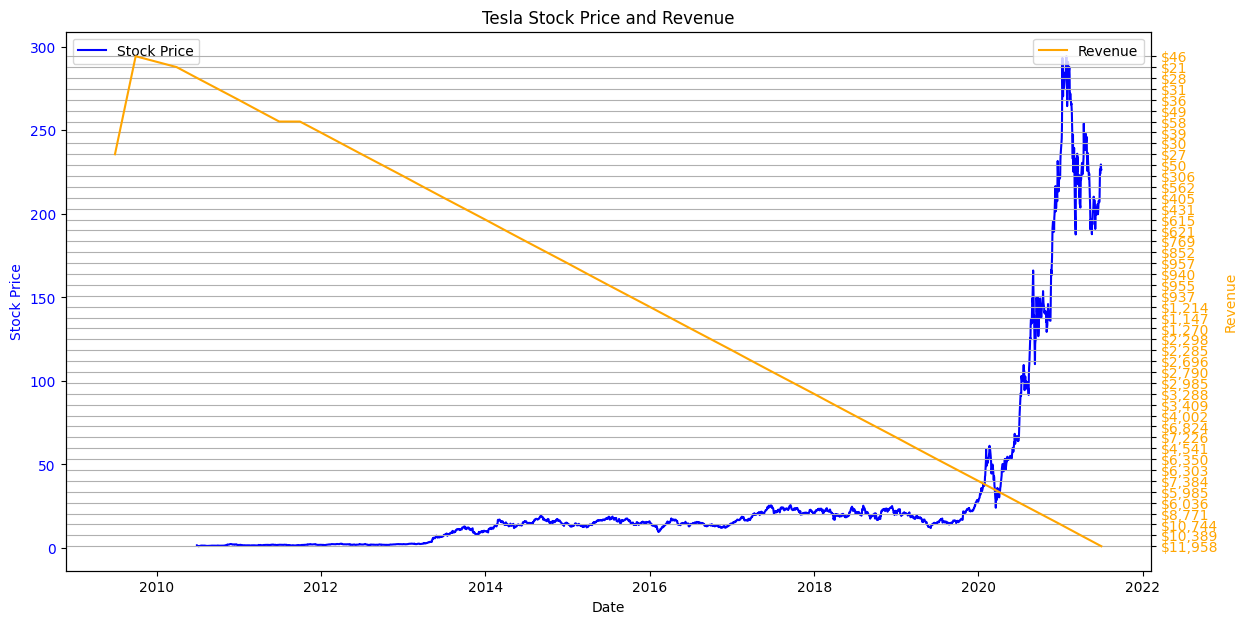

In [25]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    # Ensure date columns are in datetime format for alignment
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Plot the stock data
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')

    # Title and layout
    plt.title(f'{title} Stock Price and Revenue')
    plt.grid()
    plt.show()

# Ensure tesla_data and tesla_revenue are defined before invoking make_graph
try:
    make_graph(tesla_data, tesla_revenue, 'Tesla')
except NameError as e:
    print(f"Error: {e}. Ensure tesla_data and tesla_revenue are defined correctly.")


In [26]:
print(tesla_revenue)
tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])



         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757
5  2021-06-30  $11,958
6  2021-03-31  $10,389
7  2020-12-31  $10,744
8  2020-09-30   $8,771
9  2020-06-30   $6,036
10 2020-03-31   $5,985
11 2019-12-31   $7,384
12 2019-09-30   $6,303
13 2019-06-30   $6,350
14 2019-03-31   $4,541
15 2018-12-31   $7,226
16 2018-09-30   $6,824
17 2018-06-30   $4,002
18 2018-03-31   $3,409
19 2017-12-31   $3,288
20 2017-09-30   $2,985
21 2017-06-30   $2,790
22 2017-03-31   $2,696
23 2016-12-31   $2,285
24 2016-09-30   $2,298
25 2016-06-30   $1,270
26 2016-03-31   $1,147
27 2015-12-31   $1,214
28 2015-09-30     $937
29 2015-06-30     $955
30 2015-03-31     $940
31 2014-12-31     $957
32 2014-09-30     $852
33 2014-06-30     $769
34 2014-03-31     $621
35 2013-12-31     $615
36 2013-09-30     $431
37 2013-06-30     $405
38 2013-03-31     $562
39 2012-12-31     $306
40 2012-09-30      $50
41 2012-06-30      $27
42 2012-03-

In [27]:
tesla_revenue = tesla_revenue.sort_values(by="Date")


In [28]:
print(tesla_revenue)
tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])

         Date  Revenue
53 2009-06-30      $27
52 2009-09-30      $46
50 2010-03-31      $21
49 2010-06-30      $28
48 2010-09-30      $31
47 2010-12-31      $36
46 2011-03-31      $49
45 2011-06-30      $58
44 2011-09-30      $58
43 2011-12-31      $39
42 2012-03-31      $30
41 2012-06-30      $27
40 2012-09-30      $50
39 2012-12-31     $306
38 2013-03-31     $562
37 2013-06-30     $405
36 2013-09-30     $431
35 2013-12-31     $615
34 2014-03-31     $621
33 2014-06-30     $769
32 2014-09-30     $852
31 2014-12-31     $957
30 2015-03-31     $940
29 2015-06-30     $955
28 2015-09-30     $937
27 2015-12-31   $1,214
26 2016-03-31   $1,147
25 2016-06-30   $1,270
24 2016-09-30   $2,298
23 2016-12-31   $2,285
22 2017-03-31   $2,696
21 2017-06-30   $2,790
20 2017-09-30   $2,985
19 2017-12-31   $3,288
18 2018-03-31   $3,409
17 2018-06-30   $4,002
16 2018-09-30   $6,824
15 2018-12-31   $7,226
14 2019-03-31   $4,541
13 2019-06-30   $6,350
12 2019-09-30   $6,303
11 2019-12-31   $7,384
10 2020-03-

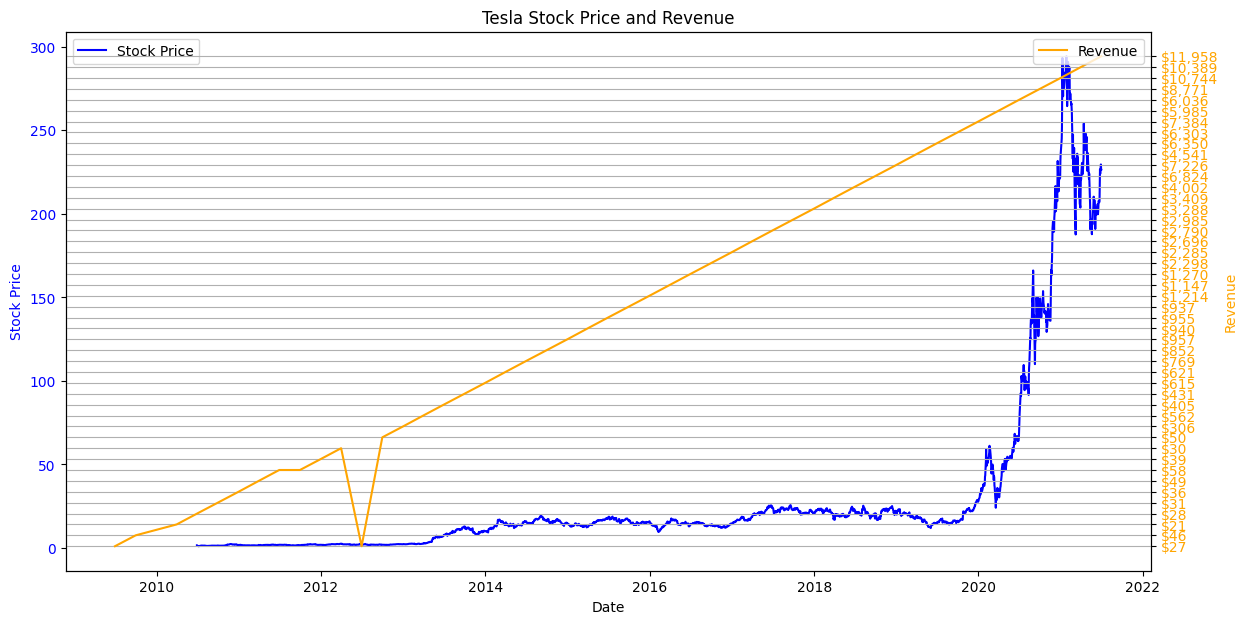

In [29]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    # Ensure date columns are in datetime format for alignment
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Plot the stock data
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')

    # Title and layout
    plt.title(f'{title} Stock Price and Revenue')
    plt.grid()
    plt.show()

# Ensure tesla_data and tesla_revenue are defined before invoking make_graph
try:
    make_graph(tesla_data, tesla_revenue, 'Tesla')
except NameError as e:
    print(f"Error: {e}. Ensure tesla_data and tesla_revenue are defined correctly.")
    

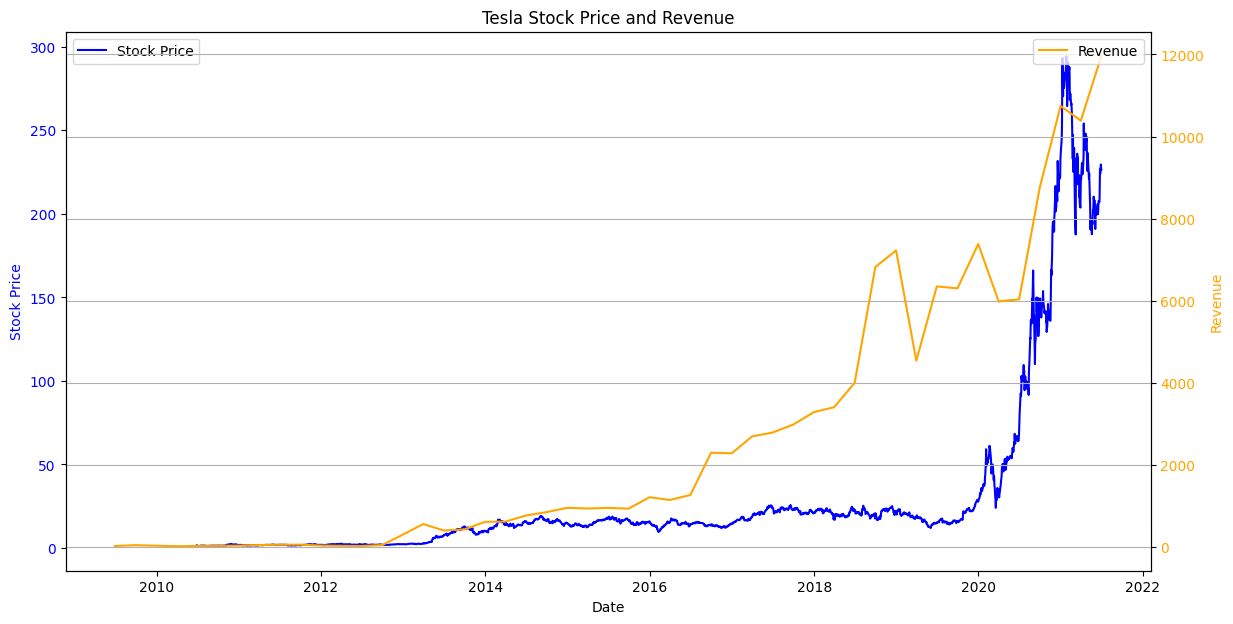

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming tesla_data and tesla_revenue are already loaded as DataFrames

# Clean and prepare the tesla_revenue DataFrame
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])  # Ensure Date column is in datetime format
tesla_revenue = tesla_revenue.sort_values(by="Date")          # Sort by Date
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Clean Revenue

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    # Ensure stock data is sorted and dates are in datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data = stock_data.sort_values(by="Date")

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Plot the stock data
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')

    # Title and layout
    plt.title(f'{title} Stock Price and Revenue')
    plt.grid()
    plt.show()

# Create the graph
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


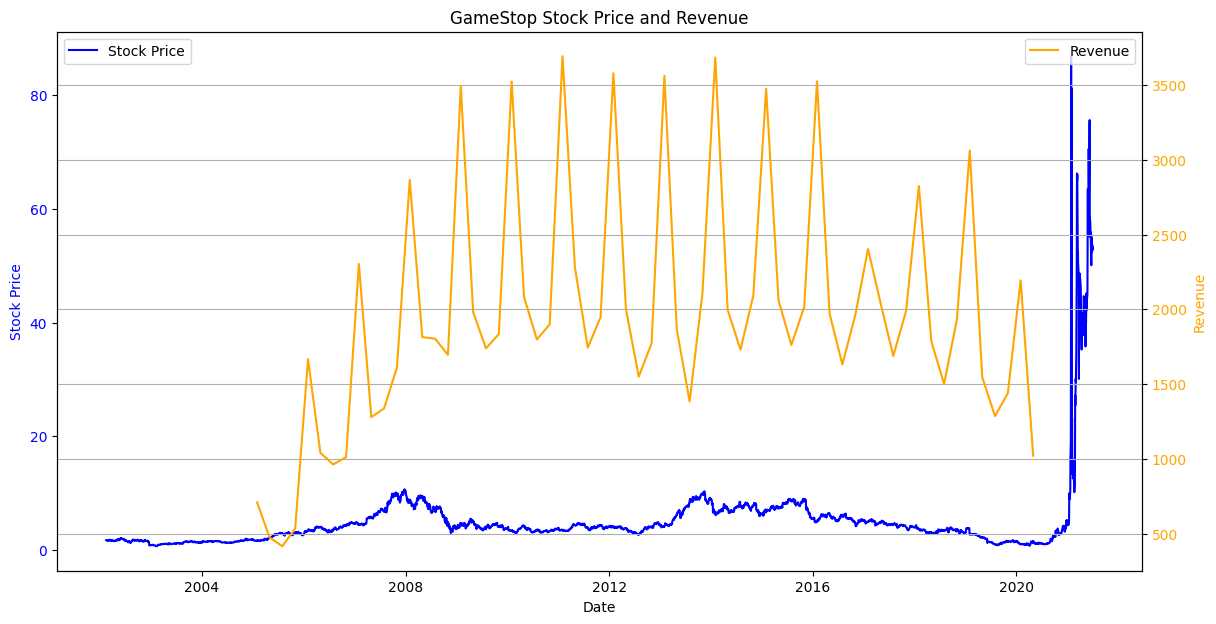

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    # Ensure date columns are in datetime format for alignment
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Plot the stock data
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')

    # Title and layout
    plt.title(f'{title} Stock Price and Revenue')
    plt.grid()
    plt.show()

# Ensure gme_data and gme_revenue are defined before invoking make_graph
try:
    make_graph(gme_data, gme_revenue, 'GameStop')
except NameError as e:
    print(f"Error: {e}. Ensure gme_data and gme_revenue are defined correctly.")


In [35]:
print(gme_revenue)
gme_revenue = gme_revenue.dropna(subset=["Revenue"])

         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548
..        ...      ...
57 2006-01-31     1667
58 2005-10-31      534
59 2005-07-31      416
60 2005-04-30      475
61 2005-01-31      709

[62 rows x 2 columns]


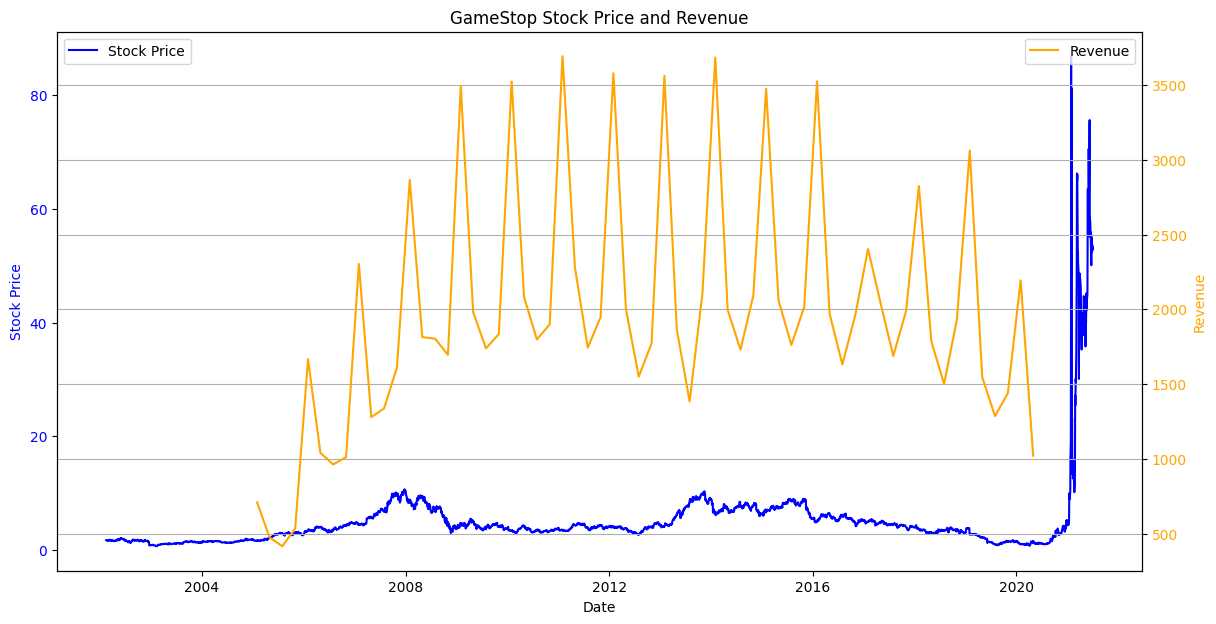

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gme_data and gme_revenue are already loaded as DataFrames

# Clean and prepare the gme_revenue DataFrame
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])  # Ensure Date column is in datetime format
gme_revenue = gme_revenue.sort_values(by="Date")          # Sort by Date
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Clean Revenue

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    # Ensure stock data is sorted and dates are in datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data = stock_data.sort_values(by="Date")

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Plot the stock data
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')

    # Title and layout
    plt.title(f'{title} Stock Price and Revenue')
    plt.grid()
    plt.show()

# Create the graph
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
